# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

We **CBB6, Chris Barnett's Best 6**, confirm - by submitting this document - that the solutions in this notebook are a result of our own work and that we abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
import datetime as dt
import matplotlib.pyplot as plt

# # Libraries for data preparation and model building
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split , cross_validate

# Setting global constants to ensure notebook results are reproducible
from sklearn.feature_selection import RFE, SelectKBest, chi2

warnings.filterwarnings('ignore')

import plotly.express as px
# libraries for data preparation and model building

# import Regressors
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RANSACRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import sklearn.neural_network as NNR
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, StackingRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor

from sklearn.metrics import mean_squared_error as mse

import math
from statsmodels.graphics.correlation import plot_corr
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
from scipy.stats import pearsonr
%matplotlib inline

ModuleNotFoundError: No module named 'xgboost'

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [ ]:
df_train = pd.read_csv('df_train.csv') # load the train data
df_test = pd.read_csv('df_test.csv')  # load the test data

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [2]:
# look at data statistics
df_train.head(1).T

NameError: name 'df_train' is not defined

In [4]:
df_train = df_train.drop(columns=['Unnamed: 0'])

In [5]:
# look at data statistics
df_train.shape

(8763, 48)

In [6]:
# look at data statistics
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 48 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  8763 non-null   object 
 1   Madrid_wind_speed     8763 non-null   float64
 2   Valencia_wind_deg     8763 non-null   object 
 3   Bilbao_rain_1h        8763 non-null   float64
 4   Valencia_wind_speed   8763 non-null   float64
 5   Seville_humidity      8763 non-null   float64
 6   Madrid_humidity       8763 non-null   float64
 7   Bilbao_clouds_all     8763 non-null   float64
 8   Bilbao_wind_speed     8763 non-null   float64
 9   Seville_clouds_all    8763 non-null   float64
 10  Bilbao_wind_deg       8763 non-null   float64
 11  Barcelona_wind_speed  8763 non-null   float64
 12  Barcelona_wind_deg    8763 non-null   float64
 13  Madrid_clouds_all     8763 non-null   float64
 14  Seville_wind_speed    8763 non-null   float64
 15  Barcelona_rain_1h    

In [7]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Madrid_wind_speed,8763.0,2.425729,1.850371,0.000000,1.000000,2.000000,3.333333,1.300000e+01
Bilbao_rain_1h,8763.0,0.135753,0.374901,0.000000,0.000000,0.000000,0.100000,3.000000e+00
Valencia_wind_speed,8763.0,2.586272,2.411190,0.000000,1.000000,1.666667,3.666667,5.200000e+01
Seville_humidity,8763.0,62.658793,22.621226,8.333333,44.333333,65.666667,82.000000,1.000000e+02
Madrid_humidity,8763.0,57.414717,24.335396,6.333333,36.333333,58.000000,78.666667,1.000000e+02
Bilbao_clouds_all,8763.0,43.469132,32.551044,0.000000,10.000000,45.000000,75.000000,1.000000e+02
Bilbao_wind_speed,8763.0,1.850356,1.695888,0.000000,0.666667,1.000000,2.666667,1.266667e+01
Seville_clouds_all,8763.0,13.714748,24.272482,0.000000,0.000000,0.000000,20.000000,9.733333e+01
Bilbao_wind_deg,8763.0,158.957511,102.056299,0.000000,73.333333,147.000000,234.000000,3.593333e+02
Barcelona_wind_speed,8763.0,2.870497,1.792197,0.000000,1.666667,2.666667,4.000000,1.266667e+01


In [8]:
# look at outliers in different columns
df_train.kurtosis()

Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          2.211823
Seville_temp_max          -0.515989
Madrid_pressure            2

<AxesSubplot:>

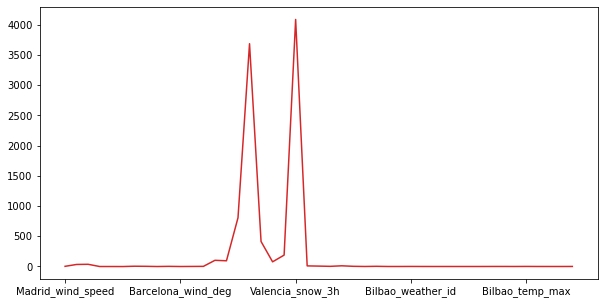

In [9]:
plt.figure(figsize = [10,5])
df_train.kurtosis(axis=0, skipna=True).plot(color = 'tab:red')

In [10]:
df_train.skew()

Madrid_wind_speed        1.441144
Bilbao_rain_1h           5.222802
Valencia_wind_speed      3.499637
Seville_humidity        -0.310175
Madrid_humidity         -0.057378
Bilbao_clouds_all       -0.053085
Bilbao_wind_speed        1.716914
Seville_clouds_all       1.814452
Bilbao_wind_deg          0.226927
Barcelona_wind_speed     1.057331
Barcelona_wind_deg      -0.180001
Madrid_clouds_all        1.246745
Seville_wind_speed       1.151006
Barcelona_rain_1h        8.726988
Seville_rain_1h          8.067341
Bilbao_snow_3h          26.177568
Barcelona_pressure      57.979664
Seville_rain_3h         19.342574
Madrid_rain_1h           7.074308
Barcelona_rain_3h       12.696605
Valencia_snow_3h        63.298084
Madrid_weather_id       -3.107722
Barcelona_weather_id    -2.584011
Bilbao_pressure         -0.999642
Seville_weather_id      -3.275574
Valencia_pressure       -1.705162
Seville_temp_max        -0.033931
Madrid_pressure         -1.850768
Valencia_temp_max        0.082672
Valencia_temp 

<AxesSubplot:>

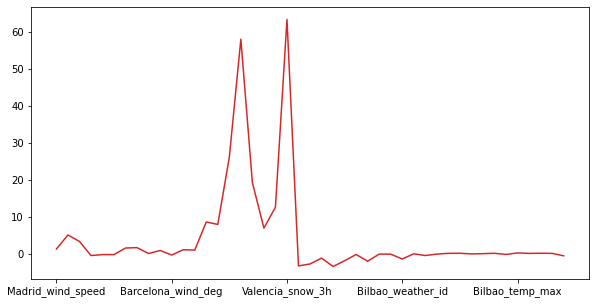

In [11]:
plt.figure(figsize = [10,5])
df_train.skew(axis=0, skipna=True).plot(color='tab:red')

<AxesSubplot:xlabel='Barcelona_pressure'>

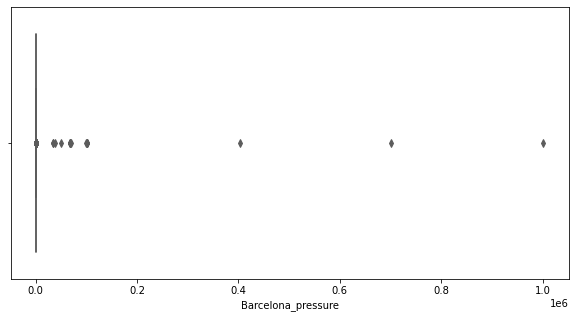

In [12]:
# plot relevant feature interactions
plt.figure(figsize = [10,5])
sns.boxplot(df_train['Barcelona_pressure'], palette='hls')

<AxesSubplot:xlabel='Valencia_wind_speed'>

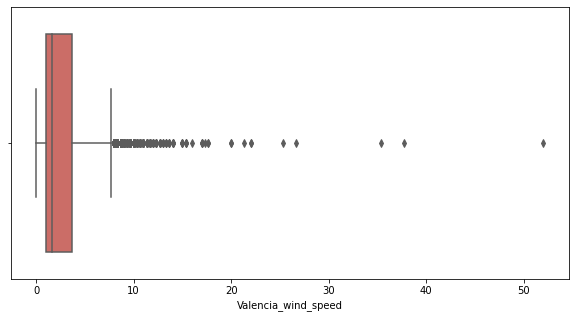

In [13]:
# plot relevant feature interactions
plt.figure(figsize = [10,5])
sns.boxplot(df_train['Valencia_wind_speed'], palette='hls')

<AxesSubplot:xlabel='Valencia_wind_deg', ylabel='load_shortfall_3h'>

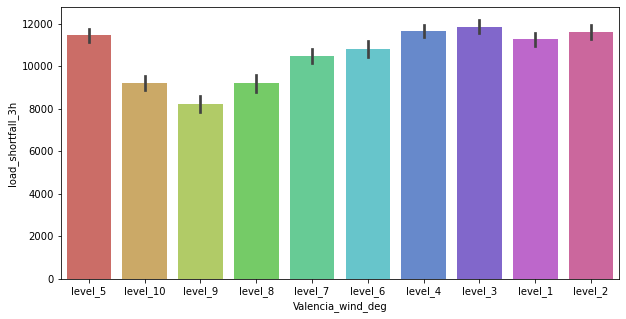

In [14]:
# plot relevant feature interactions
plt.figure(figsize=[10,5])
sns.barplot(x="Valencia_wind_deg", y="load_shortfall_3h", data=df_train, palette="hls")

(array([7.000e+01, 3.720e+02, 8.370e+02, 1.641e+03, 2.494e+03, 2.301e+03,
        9.000e+02, 1.400e+02, 7.000e+00, 1.000e+00]),
 array([-6618. , -2765.8,  1086.4,  4938.6,  8790.8, 12643. , 16495.2,
        20347.4, 24199.6, 28051.8, 31904. ]),
 <BarContainer object of 10 artists>)

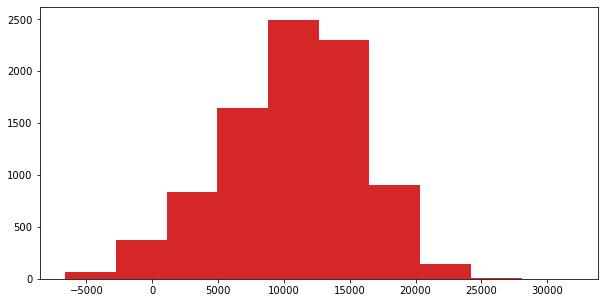

In [15]:
# plot relevant feature interactions
plt.figure(figsize=[10,5])
plt.hist(df_train['load_shortfall_3h'], color='tab:red')

<AxesSubplot:>

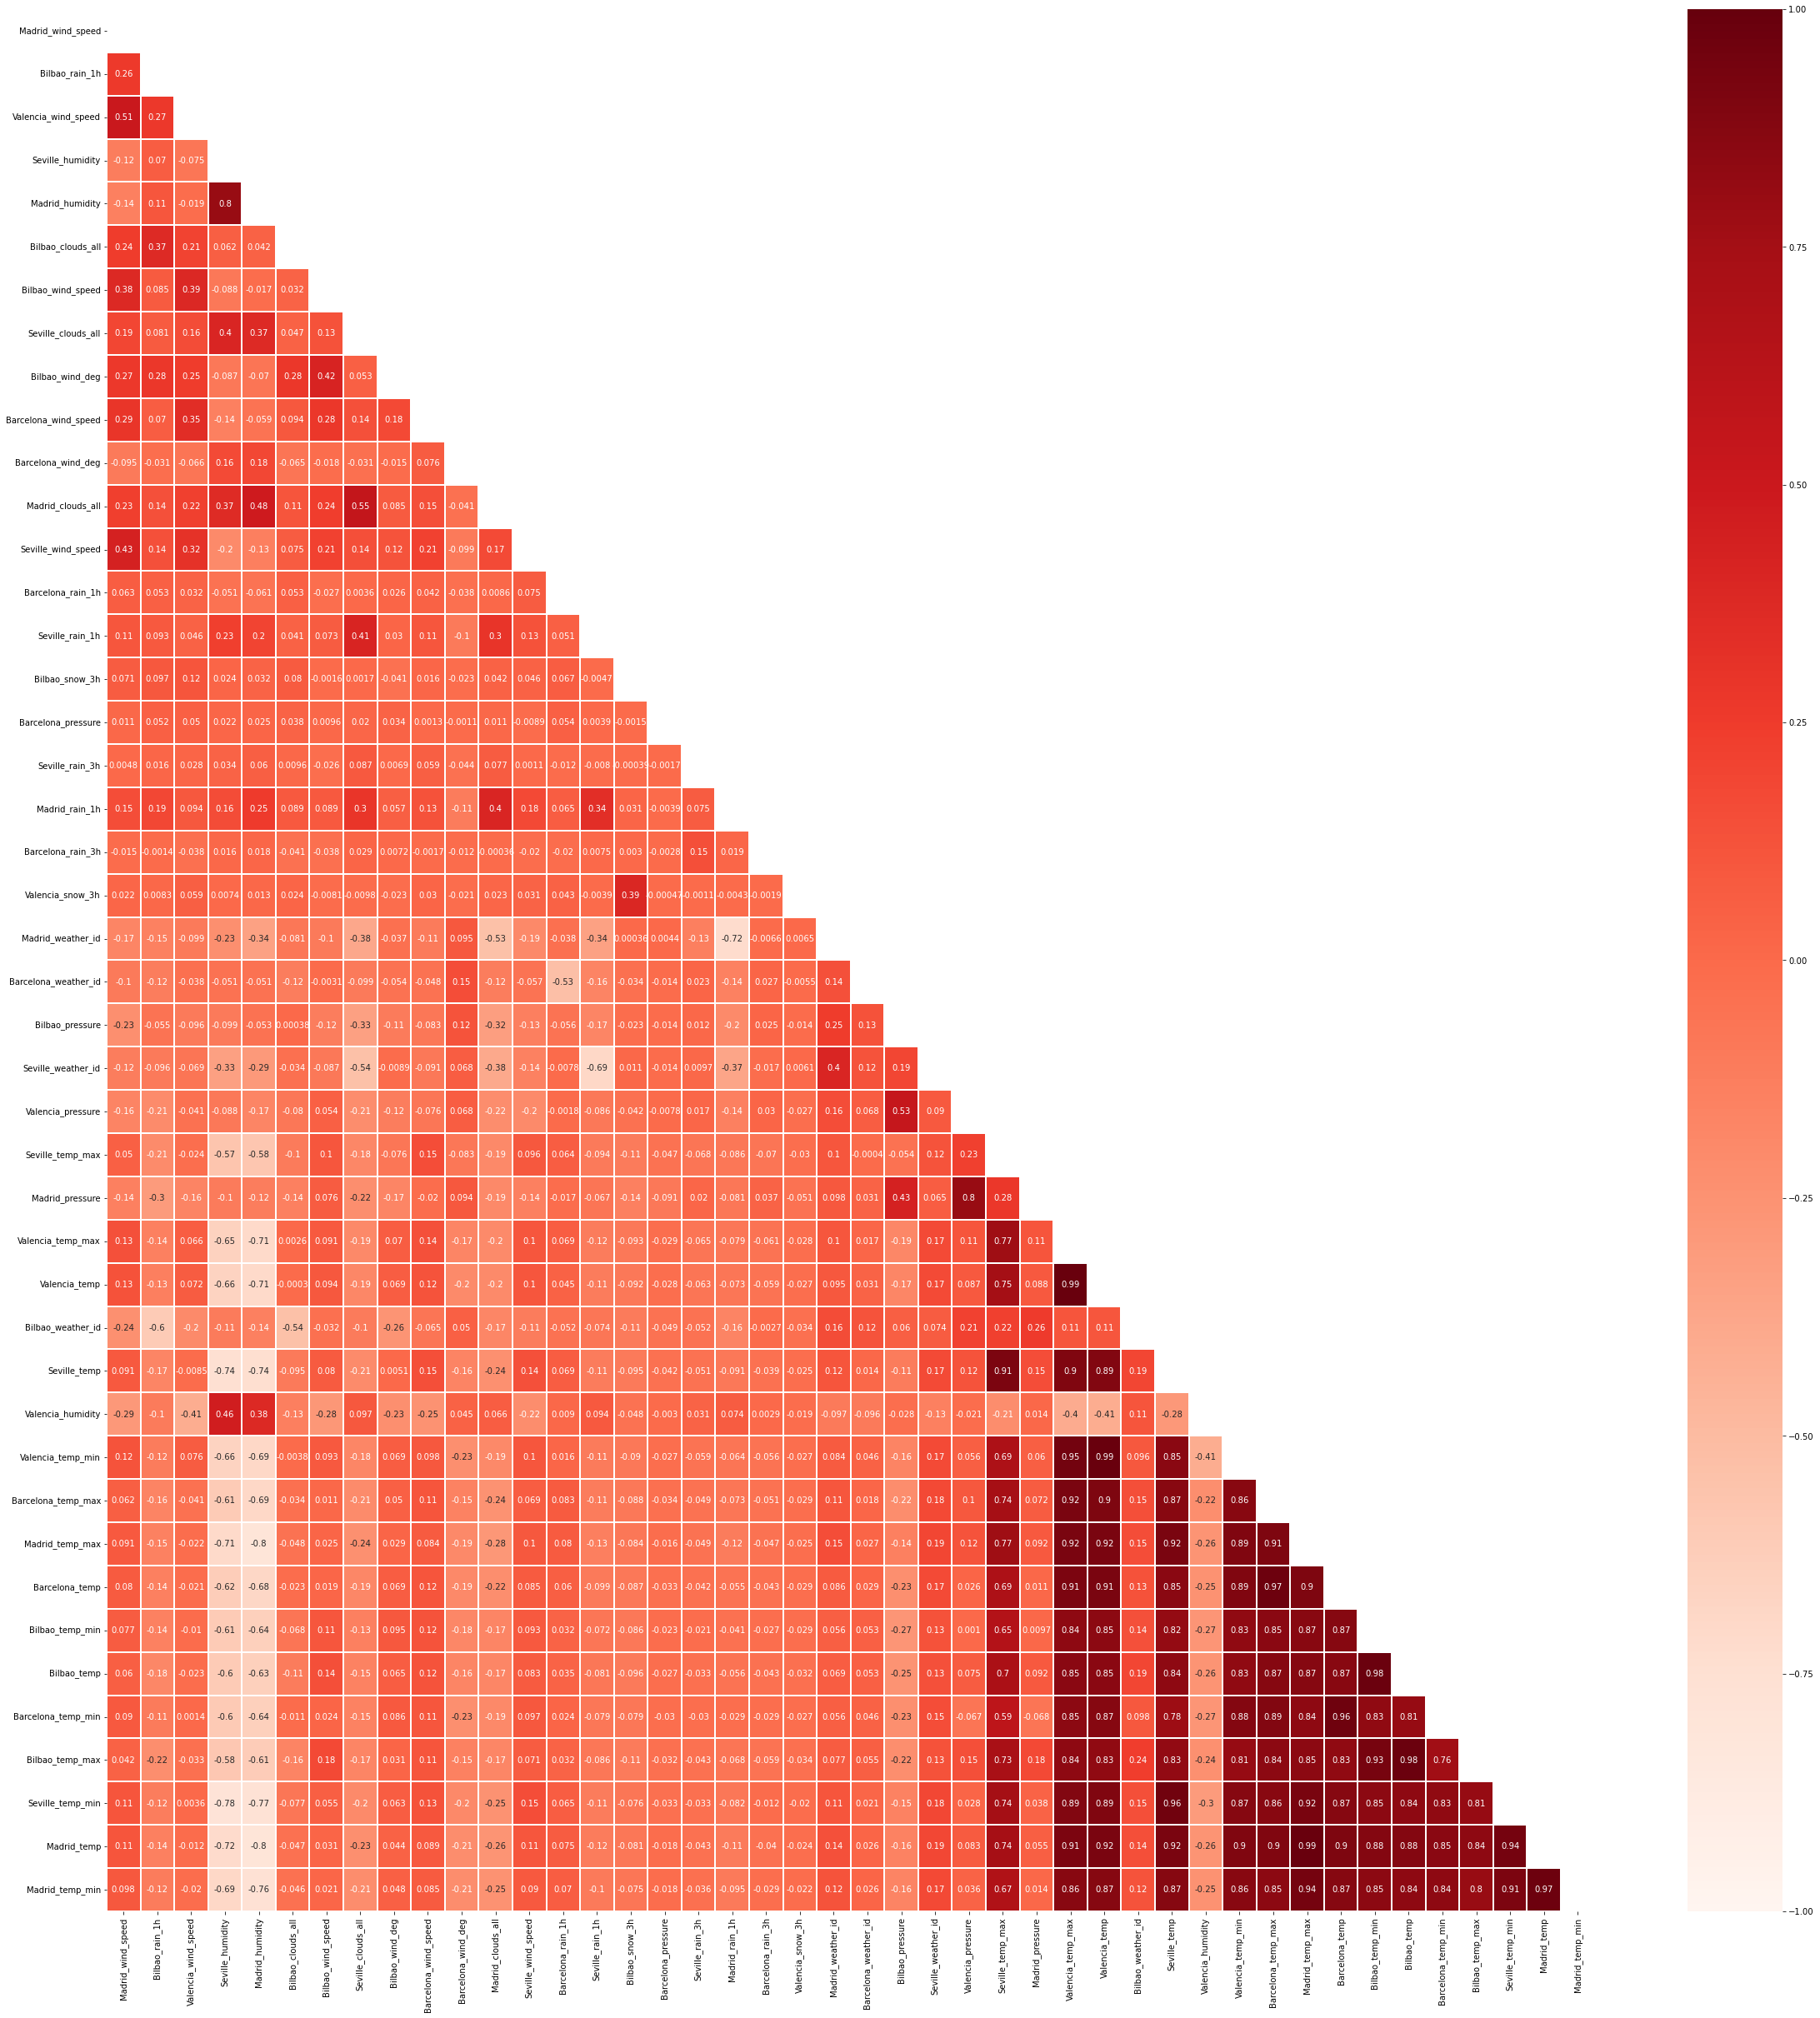

In [16]:
# evaluate correlation
#Plotting correlation heat map for predictor variable in train 
train_features = df_train.drop(['load_shortfall_3h'], axis=1)
train_corr = train_features.corr()

# Mask top half of matrix as it contains redunant info
mask = np.zeros_like(train_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

# Plot the matrix
plt.figure(figsize=(40,42))
sns.heatmap(train_corr,annot=True, vmin=-1, vmax=1, cmap='Reds', linewidth=0.1, mask=mask)

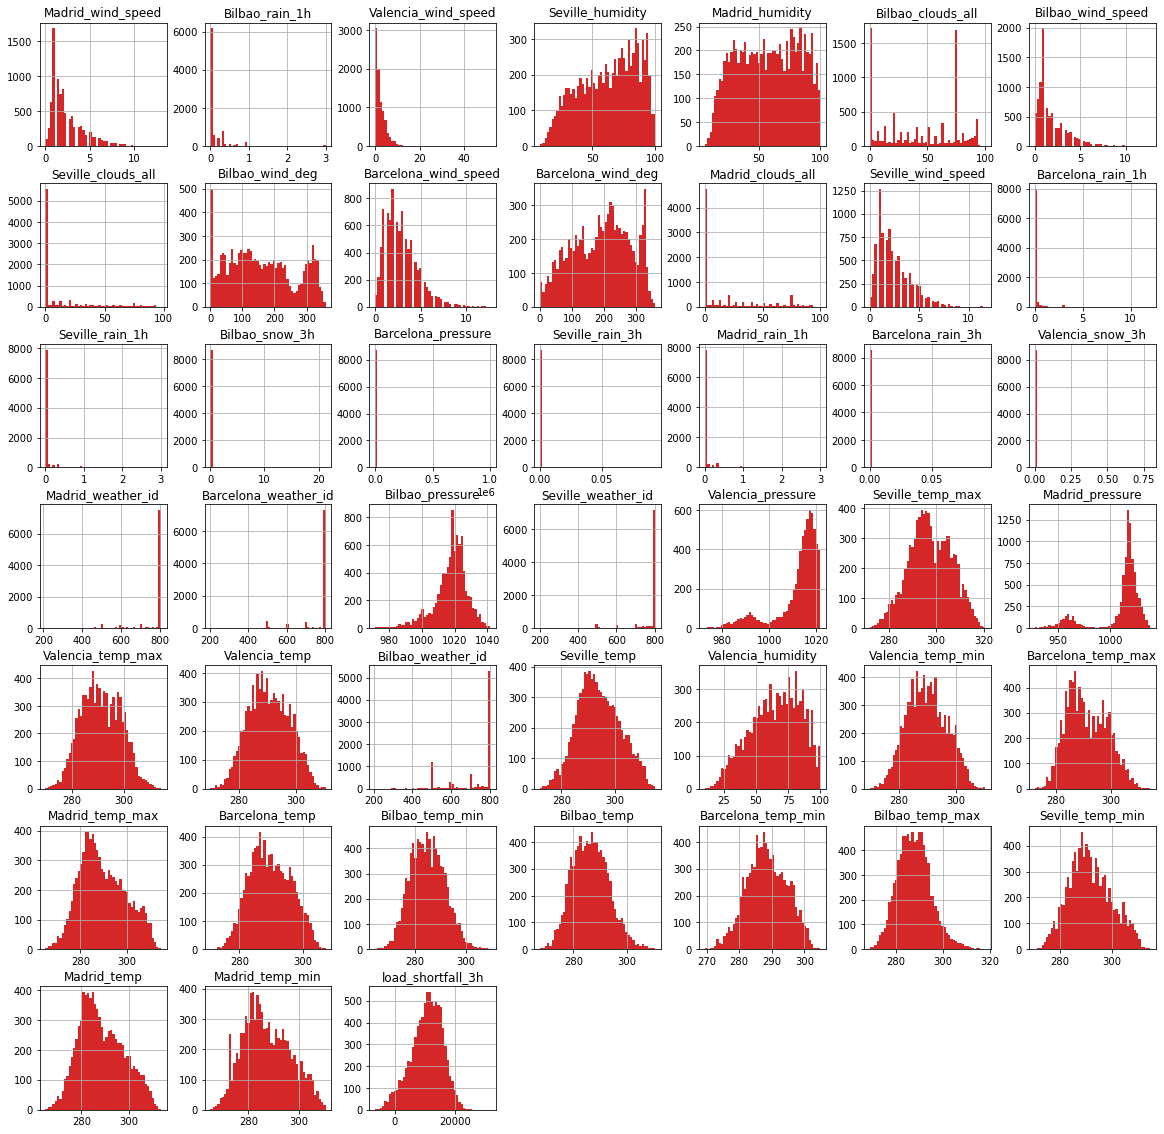

In [17]:
# plotting distributions of all the features in train
df_train.hist(bins=50, figsize=(20,20), color = 'tab:red')
plt.show()

<AxesSubplot:xlabel='load_shortfall_3h'>

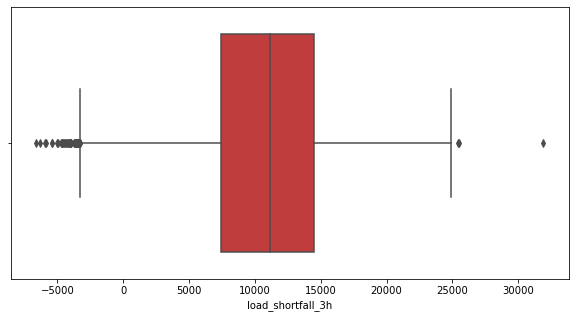

In [18]:
# have a look at feature distributions
plt.figure(figsize = [10,5])
sns.boxplot(df_train['load_shortfall_3h'], color='tab:red')

In [19]:
# check for missing values
print('Train data missing status : ' + str(df_train.isnull().sum().any()))
print('Test data missing  status : ' + str(df_test.isnull().sum().any()))

Train data missing status : True
Test data missing  status : True


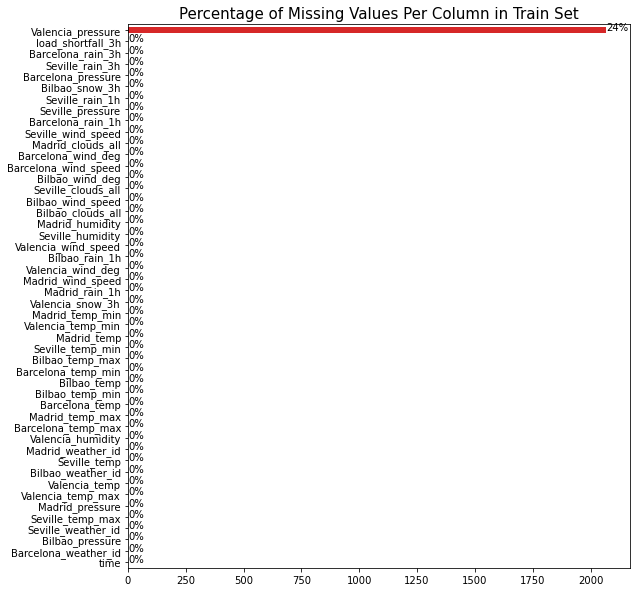

In [20]:
# plot missing values in train set
ax = df_train.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10), color='tab:red')
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/df_train.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [21]:
# get mode from both data sets to replace missing values with
mode = pd.concat([df_train.Valencia_pressure]).mode()

In [22]:
# remove missing values/ features
df_train.Valencia_pressure.fillna(mode[0], inplace=True)

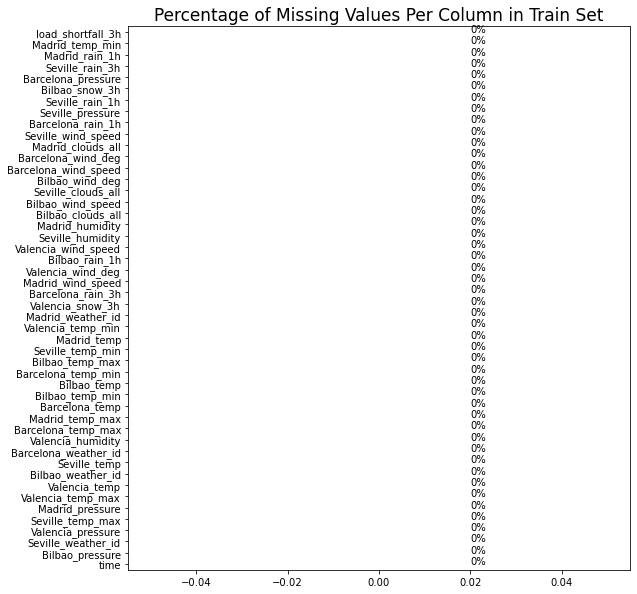

In [23]:
# plot missing values in train set
ax = df_train.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10), color='tab:red')
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':17})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/df_train.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [24]:
# create new features

In [86]:
df_train.Valencia_wind_deg.unique()
df_train.Seville_pressure.unique()

array([17., 15., 16., 13.,  7., 24.,  6., 10., 14.,  2., 23., 19., 21.,
        4.,  8., 12.,  9.,  5.,  3., 20.,  1., 22., 18., 11.,  0.])

In [26]:
#Impute Categirical features using OrdinalEncoder()
enc = OrdinalEncoder()

df_train.Valencia_wind_deg = enc.fit_transform(df_train[['Valencia_wind_deg']])
df_train.Seville_pressure = enc.fit_transform(df_train[['Seville_pressure']])

In [27]:
df_train.dtypes.value_counts()

float64    47
object      1
dtype: int64

In [28]:
# create new features

# Transform Features

df_train['time'] = pd.to_datetime(df_train['time'])

# day
df_train['Day'] = df_train['time'].dt.day

# month
df_train['Month'] = df_train['time'].dt.month

# year
df_train['Year'] = df_train['time'].dt.year

# hour
df_train['Start_hour'] = df_train['time'].dt.hour

# Drop Feature
df_train.drop(['time'] , axis=1 , inplace=True)

In [29]:
columns = df_train.drop(['load_shortfall_3h'] , axis=1).columns

In [30]:
# engineer existing features

#Scale the dataset
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_train.drop(['load_shortfall_3h'] , axis=1).values)
scaled_features = pd.DataFrame(scaled_features, columns=columns)
scaled_features.head().T

,0,1,2,3,4
Madrid_wind_speed,-0.950708,-1.130863,-0.770554,-0.770554,-0.770554
Valencia_wind_deg,0.248717,-1.157189,1.654623,1.303146,0.951670
Bilbao_rain_1h,-0.362123,-0.362123,-0.362123,-0.362123,-0.362123
Valencia_wind_speed,-0.796169,-0.381412,-0.657917,-0.657917,-0.657917
Seville_humidity,0.516117,0.692953,0.383491,0.118238,-0.161751
Madrid_humidity,0.270621,0.298017,0.284319,-0.044439,-0.017043
Bilbao_clouds_all,-1.335491,-1.335491,-1.335491,-1.335491,-1.274045
Bilbao_wind_speed,-0.501451,-0.501451,-0.501451,-0.501451,-0.894581
Seville_clouds_all,-0.565065,-0.565065,-0.565065,-0.565065,-0.565065
Bilbao_wind_deg,0.630823,0.607959,0.542632,0.398912,0.255192


In [31]:
df_train_scaled = pd.DataFrame(scaled_features, index=df_train.index, columns=columns)

In [32]:
#Add load_short_fall_3h as last_columns on training data
df_train_scaled['load_shortfall_3h'] = df_train.copy().load_shortfall_3h.values

In [33]:
# engineer existing features


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [34]:
# split data
X = df_train_scaled.drop(['load_shortfall_3h'], axis=1)
y = df_train_scaled.load_shortfall_3h
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3332, random_state=42)

In [35]:
r_selection = RFE(RandomForestRegressor(n_estimators=100 , random_state=0 , n_jobs=1), n_features_to_select=14)

In [37]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Madrid_wind_speed     8763 non-null   float64
 1   Valencia_wind_deg     8763 non-null   float64
 2   Bilbao_rain_1h        8763 non-null   float64
 3   Valencia_wind_speed   8763 non-null   float64
 4   Seville_humidity      8763 non-null   float64
 5   Madrid_humidity       8763 non-null   float64
 6   Bilbao_clouds_all     8763 non-null   float64
 7   Bilbao_wind_speed     8763 non-null   float64
 8   Seville_clouds_all    8763 non-null   float64
 9   Bilbao_wind_deg       8763 non-null   float64
 10  Barcelona_wind_speed  8763 non-null   float64
 11  Barcelona_wind_deg    8763 non-null   float64
 12  Madrid_clouds_all     8763 non-null   float64
 13  Seville_wind_speed    8763 non-null   float64
 14  Barcelona_rain_1h     8763 non-null   float64
 15  Seville_pressure     

In [38]:
df_train_scaled = pd.DataFrame(scaled_features, index=df_train.index, columns=columns)

In [39]:
# add load_short_fall_3h as last_columns on training data
df_train_scaled['load_shortfall_3h'] = df_train.copy().load_shortfall_3h.values

In [40]:
#checking the shape of the training and testing data

print('Training predictor:', X_train.shape)
print('Training target:', y_train.shape)
print('Testing predictor:', X_test.shape)
print('Testing target:', y_test.shape)

Training predictor: (5843, 50)
Training target: (5843,)
Testing predictor: (2920, 50)
Testing target: (2920,)


In [41]:
# create targets and features dataset

In [42]:
# create one or more ML models
decision_tree = DecisionTreeRegressor(max_depth=100, random_state=42)
annt = NNR.MLPRegressor(random_state=42)
gbr = GradientBoostingRegressor(random_state=42)

In [43]:
# ensemble with Bagging
bagging_decision_tree_regressor = BaggingRegressor(base_estimator=decision_tree)
bagging_annt_regressor = BaggingRegressor(base_estimator=annt)
bagging_gbr_regressor = BaggingRegressor(base_estimator=gbr)

In [44]:
# ensemble with AdaBost
AdaBoost_decision_tree_regressor = AdaBoostRegressor(base_estimator=decision_tree)
AdaBoost_annt_regressor = AdaBoostRegressor(base_estimator=annt)
AdaBoost_gbr_regressor = AdaBoostRegressor(base_estimator=gbr)

In [47]:
# train Bagging ensembled models
bagging_decision_tree_regressor.fit(X_train, y_train)
bagging_annt_regressor.fit(X_train, y_train)
bagging_gbr_regressor.fit(X_train, y_train)

BaggingRegressor(base_estimator=Ridge(solver='lsqr'))

In [48]:
# train AdaBoost ensembled models
AdaBoost_decision_tree_regressor.fit(X_train, y_train)
AdaBoost_annt_regressor.fit(X_train, y_train)
AdaBoost_gbr_regressor.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=Ridge(solver='lsqr'))

In [56]:
# get Bagging ensembled predictions
decision_bagging_tree_pred = bagging_decision_tree_regressor.predict(X_test)
annt_bagging_pred = bagging_annt_regressor.predict(X_test)
gbr_bagging_pred = bagging_gbr_regressor.predict(X_test)
# get AdaBoosted predictions
decision_ada_boost_tree_pred = AdaBoost_decision_tree_regressor.predict(X_test)
annt_ada_boost_pred = AdaBoost_annt_regressor.predict(X_test)
gbr_ada_boost_pred = AdaBoost_gbr_regressor.predict(X_test)
ridge_ada_boost_pred = AdaBoost_gbr_regressor.predict(X_test)

In [58]:
# evaluate one or more ML models
bagging_decision_tree_model = pd.DataFrame({'Actual': y_test, 'Predicted': decision_bagging_tree_pred})
bagging_annt_model = pd.DataFrame({'Actual': y_test, 'Predicted': annt_bagging_pred})
bagging_gbr_model = pd.DataFrame({'Actual': y_test, 'Predicted': gbr_bagging_pred})
# evaluate one or more ML models
ada_boost_decision_tree_model = pd.DataFrame({'Actual': y_test, 'Predicted': decision_ada_boost_tree_pred})
ada_boost_annt_model = pd.DataFrame({'Actual': y_test, 'Predicted': annt_ada_boost_pred})
ada_boost_gbr_model = pd.DataFrame({'Actual': y_test, 'Predicted': gbr_ada_boost_pred})
ada_boost_ridge_model = pd.DataFrame({'Actual': y_test, 'Predicted': ridge_ada_boost_pred})

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [61]:
# Compare model performance
bagging_model_performance = {
                        'Test RMSE':
                            {
                                "Decision Tree Model Ensembled with Bagging": np.sqrt(mse(y_test, decision_bagging_tree_pred)),
                                "Neural Network Model Ensembled with Bagging": np.sqrt(mse(y_test, annt_bagging_pred)),
                                "Gradient Boost Model Ensembled with Bagging": np.sqrt(mse(y_test, gbr_bagging_pred))
                            }
                    }
ada_boost_model_performance = {
                                'Test RMSE':
                                    {
                                        "Decision Tree Model Ensembled with AdaBoost": np.sqrt(mse(y_test, decision_ada_boost_tree_pred)),
                                        "Neural Network Model Ensembled with Bagging": np.sqrt(mse(y_test, annt_ada_boost_pred)),
                                        "Gradient Boost Model Ensembled with AdaBoost": np.sqrt(mse(y_test, gbr_ada_boost_pred)),
                                        "Ridge Boost Model Ensembled with AdaBoost": np.sqrt(mse(y_test, gbr_ada_boost_pred))
                                    }
                            }
# create dataframe from dictionary
bagging_model_performance = pd.DataFrame(data=bagging_model_performance)
ada_boost_model_performance = pd.DataFrame(data=ada_boost_model_performance)
print(bagging_model_performance)
print(ada_boost_model_performance)

                                               Test RMSE
Decision Tree Model Ensembled with Bagging   3415.638157
Gradient Boost Model Ensembled with Bagging  3607.777082
Lasso Model Ensembled with Bagging           4791.320720
Linear Model Ensembled with Bagging          4788.603203
Neural Network Model Ensembled with Bagging  5862.441021
RANSAC Model Ensembled with Bagging          5154.425707
Ridge Model Ensembled with Bagging           4795.664875
SVR Model Ensembled with Bagging             5283.170986
                                                Test RMSE
Decision Tree Model Ensembled with AdaBoost   3180.713954
Gradient Boost Model Ensembled with AdaBoost  3570.478789
Lasso Model Ensembled with AdaBoost           4834.889613
Linear Model Ensembled with AdaBoost          4843.177781
Neural Network Model Ensembled with Bagging   5505.459167
RANSAC Model Ensembled with AdaBoost          5163.309660
Ridge Boost Model Ensembled with AdaBoost     3570.478789
SVR Model Ensembled wit

In [85]:
predictions = pd.DataFrame(gbr_ada_boost_pred, columns=['load_shortfall_3h'])
target = pd.DataFrame({"time": df_test.copy()['time'].reset_index(drop=True)})
CSV_submission_file = target.join(predictions)
CSV_submission_file['load_shortfall_3h'] = predictions.values
CSV_submission_file.to_csv("gbr_ada_boost.csv", index=False)

In [ ]:
import pickle

model_save_path = "CBB6.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(gbr_ada_boost_pred,file)

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic